<a href="https://colab.research.google.com/github/ahnafhabibi/diabetes-data-science/blob/main/classification_diabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prince ##libraries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install mixed-naive-bayes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
## Libraries
import prince
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
import imblearn
import random
import sklearn
import mixed_naive_bayes

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [ ]:
diabetics=pd.read_csv("diabetes_data_upload.csv")

In [ ]:
## How does the data look in a dataframe?
print("length of dataframe is " + str(len(diabetics)))
print("length of features is "+str(len(diabetics.columns)))
diabetics.head()

length of dataframe is 520
length of features is 17


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


We can see that there are 520 respondents/patients in this study and there are 17 features/predictors in our study. First of all, we need to understand the distribution of the age of the respondents to account for study error. Clearly, some of the predictors are related to one other for example Polyuria, Polydipsia and Polyphagia which are issues concerning urination, increase in thrist and hunger.

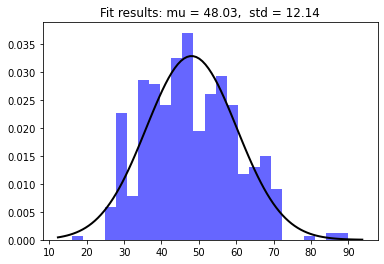

In [ ]:
age=diabetics['Age'].tolist()
mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
plt.hist(age, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2) 
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

From the plot above, the age distribution is fairly normal with mean 48 and standard deviation 12.14 hence almost 2/3rd of our respondents were between the age of 36 to 60 so we need to account this study error into our model. Hence, it is important to let the users know that the model was built around this age distribution of respondents. Apart from this, the respondents were from Sylhet, Bangladesh and therefore demographics changes may result in study error.

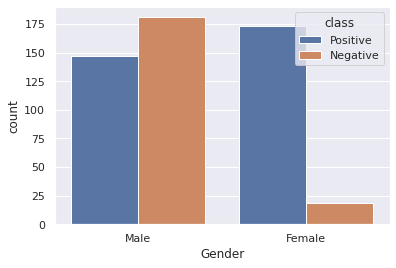

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender",hue="class", data=diabetics)

As we can see there is a class imbalance in the female population which could lead to misleading results. So let us start by investigating what is actually happening in the female population.

In [ ]:
female=diabetics[diabetics["Gender"]=='Female']
male=diabetics[diabetics["Gender"]=='Male']

In [ ]:
from sklearn.model_selection import train_test_split
female_train, female_test = train_test_split(female, test_size=0.15,random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
male_train, male_test = train_test_split(male, test_size=0.10,random_state=1)

In [ ]:
diabetics_train=pd.concat([male_train,female_train])
diabetics_train=diabetics_train.reset_index()
diabetics_test=pd.concat([male_test,female_test])
diabetics_test=diabetics_test.reset_index()

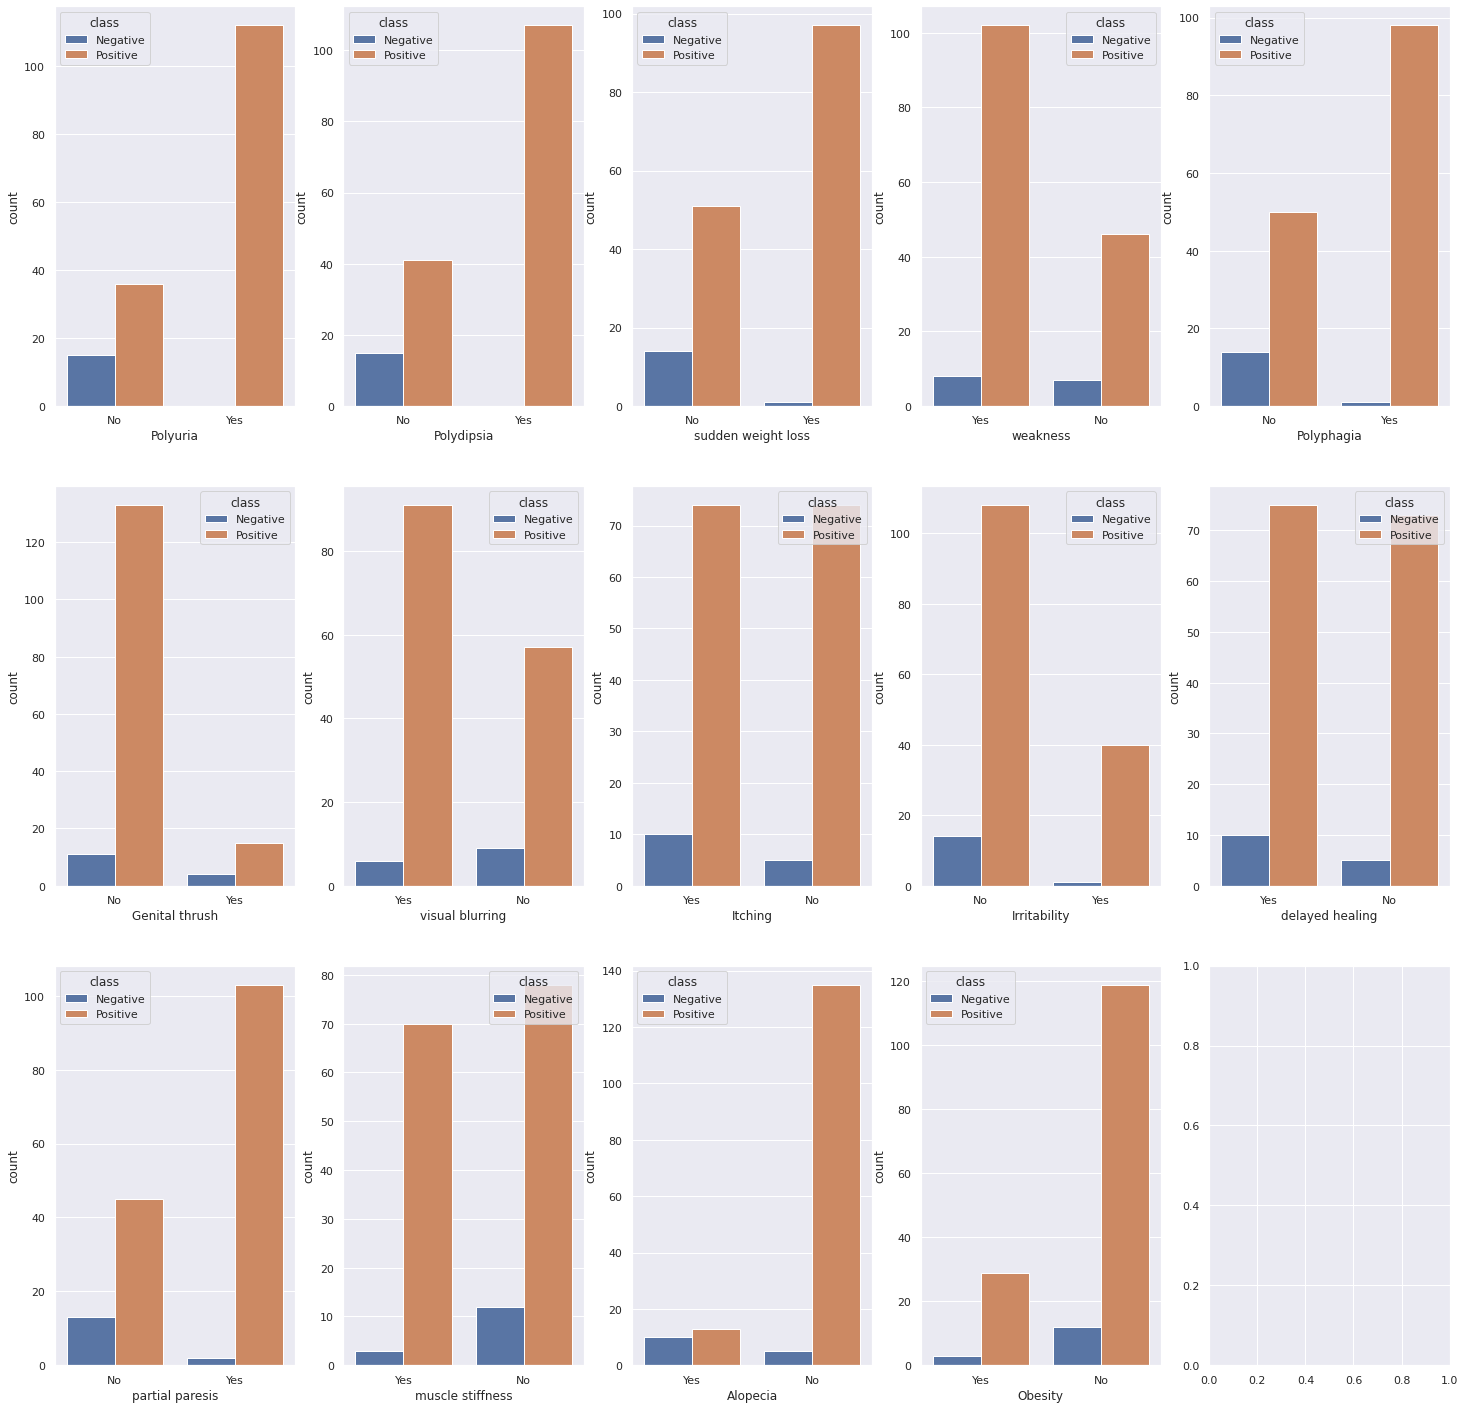

In [ ]:
sns.set_theme(style="darkgrid")
cols=['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
fig, ax =plt.subplots(3,5)
fig.set_figwidth(25)
fig.set_figheight(25)
k=0
j=0
for i in cols:
  if j==5:
    k=k+1
    j=0

  sns.countplot(x=i,hue="class", data=female_train,ax=ax[k,j])
  j=j+1
#sns.countplot(x="Polyuria",hue="class", data=female,ax=ax[0,4])
fig.show()

In [ ]:
diabetics_train

,index,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,202,37,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
1,194,43,Male,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Positive
2,158,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive
3,381,53,Male,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,No,Positive
4,353,60,Male,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,No,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,338,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
454,342,35,Female,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Positive
455,119,34,Female,Yes,Yes,No,Yes,No,No,No,No,Yes,No,No,Yes,No,No,Positive
456,345,58,Female,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,Positive


As you can see, most of the females that were chosen for the study, already tested positive or likely to be tested positive for diabetics. To explain more, majority of women that were chosen, had indicators or features that would likely make them diabetic.

In [ ]:
diabetics_train=diabetics_train.replace(to_replace="Yes",value=1)
diabetics_train=diabetics_train.replace(to_replace="No",value=0)
diabetics_train=diabetics_train.replace(to_replace="Male",value=1)
diabetics_train=diabetics_train.replace(to_replace="Female",value=0)
diabetics_train=diabetics_train.replace(to_replace="Positive",value=1)
diabetics_train=diabetics_train.replace(to_replace="Negative",value=0)
female_train=diabetics_train[diabetics_train['Gender']==0]

In [ ]:
female_train=female_train.reset_index()
female_train=female_train.loc[:,female_train.columns!='index']
female_train=female_train.loc[:,female_train.columns!='level_0']
female_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,59,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,0
1,68,0,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1
2,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1
3,31,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1
4,35,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,48,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
159,35,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1
160,34,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1
161,58,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1


In [ ]:
# import library
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(categorical_features=list(range(2,16)))
# fit predictor and target variable
x=female_train.loc[:,female_train.columns!='class']
y=female_train["class"]
x_smote, y_smote = smote.fit_resample(x, y)
print(x_smote.head())
x_smote=x_smote.replace(to_replace=1,value="Yes")
x_smote=x_smote.replace(to_replace=0,value="No")
y_smote=y_smote.replace(to_replace=1,value="Positive")
y_smote=y_smote.replace(to_replace=0,value="Negative")
x_smote['class']=y_smote
female_train=x_smote.copy()

   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   59       0         0           0                   0         1   
1   68       0         1           1                   1         0   
2   61       0         1           0                   0         0   
3   31       0         1           1                   1         1   
4   35       0         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                1        1             0   
1           1               1                1        0             1   
2           1               0                0        0             1   
3           1               0                0        1             1   
4           1               0                0        1             0   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
0                1                0                 1         1  

In [ ]:
female_train

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,59,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Negative
1,68,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Positive
2,61,No,Yes,No,No,No,Yes,No,No,No,Yes,No,No,No,Yes,No,Positive
3,31,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,Positive
4,35,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,51,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
292,50,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
293,52,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
294,34,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


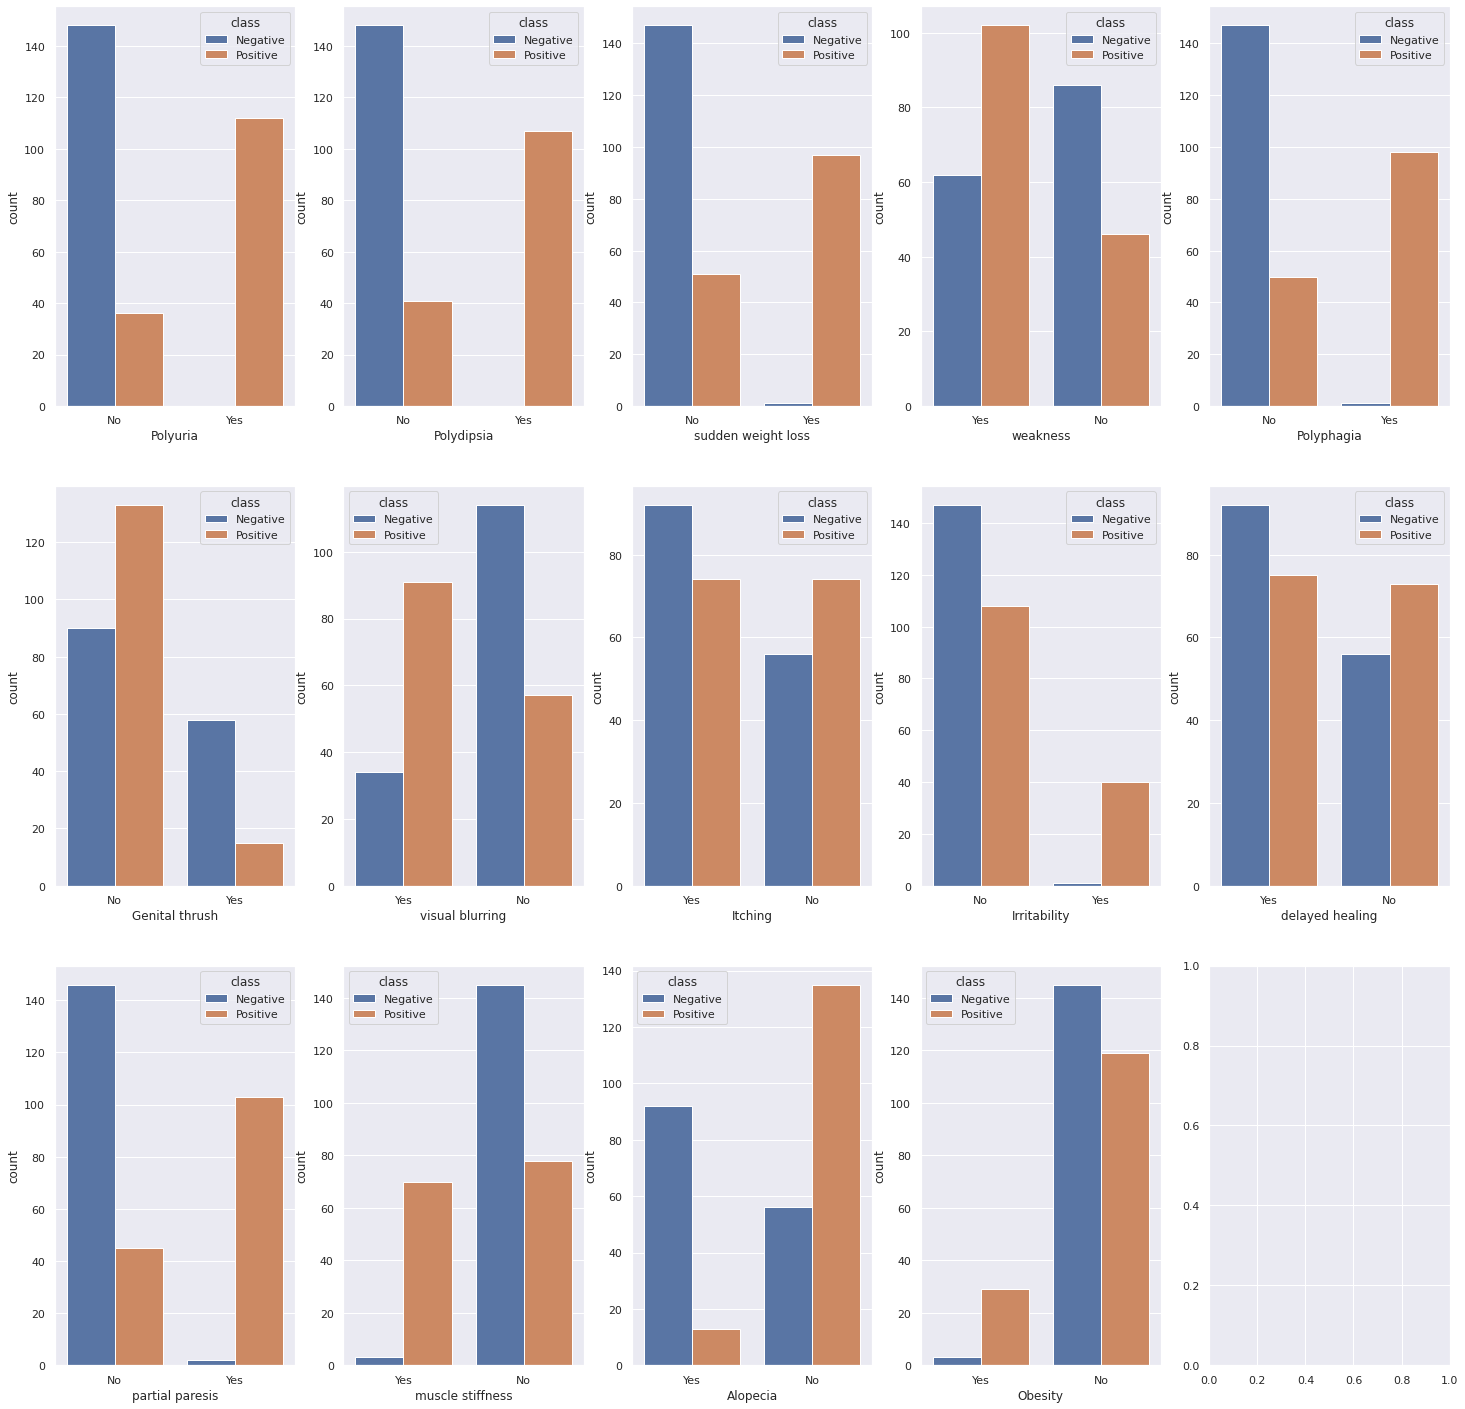

In [ ]:
sns.set_theme(style="darkgrid")
cols=['Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
fig, ax =plt.subplots(3,5)
fig.set_figwidth(25)
fig.set_figheight(25)
k=0
j=0
for i in cols:
  if j==5:
    k=k+1
    j=0

  sns.countplot(x=i,hue="class", data=female_train,ax=ax[k,j])
  j=j+1
#sns.countplot(x="Polyuria",hue="class", data=female,ax=ax[0,4])
fig.show()

With Smote, we have generated some synthetic samples to address this issue and from the plots, the distribution looks much better. We will see if it will actually improve the performance of the models later on. Next, we will join the datasets back again.

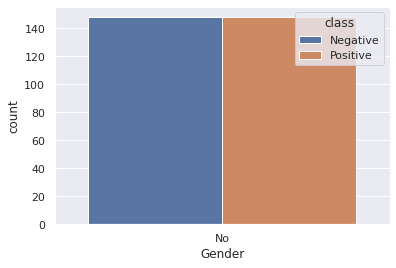

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender",hue="class", data=female_train)

In [ ]:
diabetics_train=pd.concat([male_train,female_train])

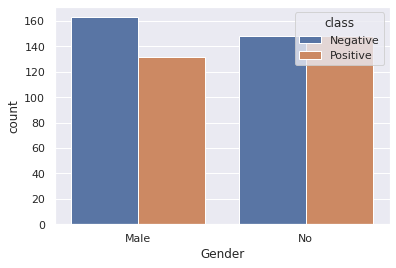

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender",hue="class", data=diabetics_train)

In [ ]:
diabetics_train=diabetics_train.replace(to_replace="Yes",value=1)
diabetics_train=diabetics_train.replace(to_replace="No",value=0)
diabetics_train=diabetics_train.replace(to_replace="Male",value=1)
diabetics_train=diabetics_train.replace(to_replace="Female",value=0)
diabetics_train=diabetics_train.replace(to_replace="Positive",value=1)
diabetics_train=diabetics_train.replace(to_replace="Negative",value=0)

In [ ]:
from mixed_naive_bayes import MixedNB
X=diabetics_train.loc[:,diabetics_train.columns!='class']
y=diabetics_train["class"]
clf=MixedNB(categorical_features=[1,15])
clf.fit(X,y)

[2 2]


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
diabetics_test=diabetics_test.replace(to_replace="Yes",value=1)
diabetics_test=diabetics_test.replace(to_replace="No",value=0)
diabetics_test=diabetics_test.replace(to_replace="Male",value=1)
diabetics_test=diabetics_test.replace(to_replace="Female",value=0)
diabetics_test=diabetics_test.replace(to_replace="Positive",value=1)
diabetics_test=diabetics_test.replace(to_replace="Negative",value=0)

In [ ]:
diabetics_test=diabetics_test.loc[:,diabetics_test.columns!='index']

In [ ]:
X=diabetics_test.loc[:,diabetics_test.columns!='class']
y=diabetics_test["class"]
pred_values=clf.predict(X)
pred_values

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
import pandas as pd
y_actu = pd.Series(y, name='Actual')
y_pred = pd.Series(pred_values, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [ ]:
df_confusion

Predicted,0,1
Actual,,
0,18,4
1,6,34


In [ ]:
X['actual']=y
X['pred']=pred_values

In [ ]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,actual,pred
0,43,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1
1,62,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1,1
2,60,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1
3,38,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,45,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,56,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,1
58,28,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0
59,50,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0
60,50,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1
